In [1]:
# @title Clone GitHub repository, install dependencies and check PyTorch and GPU.
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-399-g8cc44963 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.1/112.6 GB disk)


In [2]:
# @title Export to ONNX models (instance segmentation)
!python export.py --weights yolov5n-seg.pt --include onnx --simplify
#!python export.py --weights yolov5s-seg.pt --include onnx --simplify
#!python export.py --weights yolov5m-seg.pt --include onnx  --simplify

export: data=data/coco128.yaml, weights=['yolov5n-seg.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, cache=, simplify=True, mlmodel=False, opset=17, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-399-g8cc44963 Python-3.11.11 torch-2.6.0+cu124 CPU

100% 4.11M/4.11M [00:00<00:00, 79.6MB/s]

Fusing layers... 
YOLOv5n-seg summary: 224 layers, 1986637 parameters, 0 gradients, 7.1 GFLOPs

PyTorch: starting from yolov5n-seg.pt with output shape (1, 25200, 117) (4.1 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 292.8 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 4.6s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to tak

segment/predict: weights=['yolov5n-seg.onnx'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-399-g8cc44963 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)

Loading yolov5n-seg.onnx for ONNX Runtime inference...
requirements: Ultralytics requirement ['onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.8/280.8 MB 252.1 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 12.5s, installed 1 package: ['onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

image 1/2 /content/yolov5/data

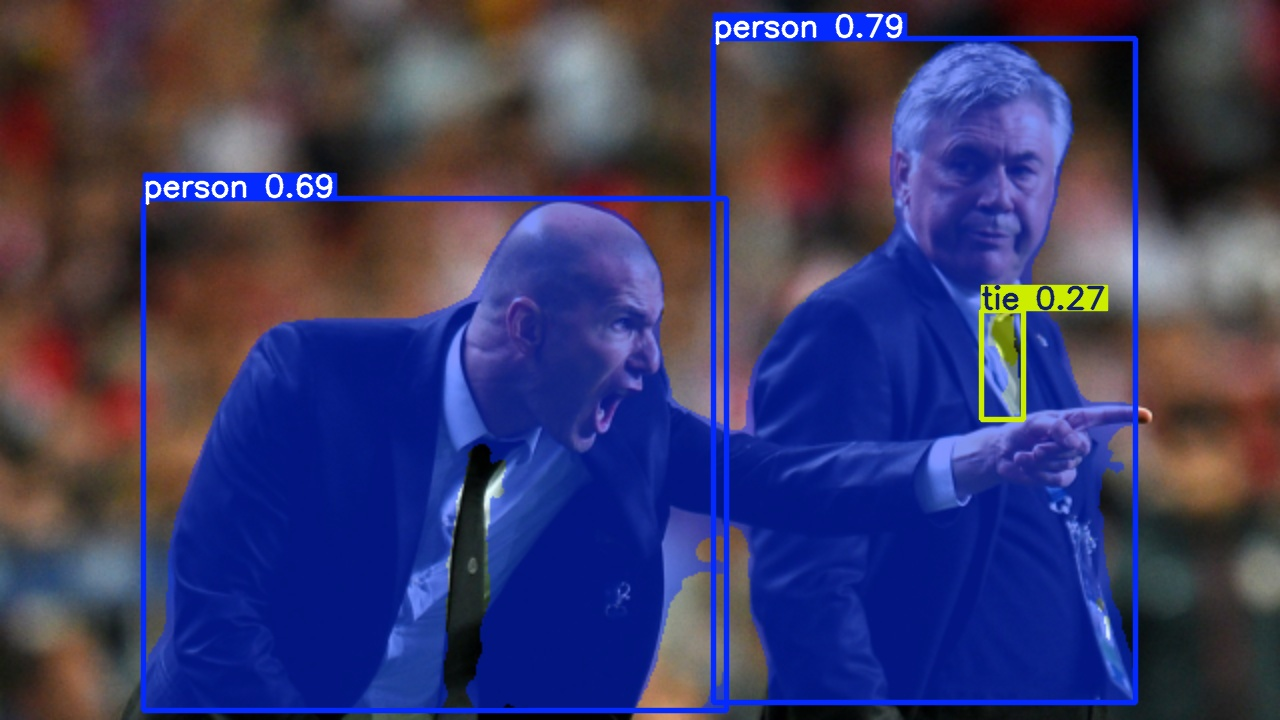

In [3]:
# @title ONNXRuntime Demo
!python segment/predict.py --weights yolov5n-seg.onnx --img 640 --conf 0.25 --source data/images
display.Image(filename='runs/predict-seg/exp/zidane.jpg', width=600)